In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
airbnb_df = pd.read_csv("../data/raw/airbnb_listings.csv")
airbnb_df.head(5)

/var/folders/td/ww89yxjs78g7pbjshk80ysbr0000gn/T/ipykernel_95483/3894714644.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv("../data/raw/airbnb_listings.csv")


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [2]:
def rename_columns(data, cols):
    return data.rename(columns = cols, inplace = True)

cols = {
    "NAME": "name", 
    "host id": "host_id",
    "host name": "host_name",
    "neighbourhood group": "neighbourhood_group",
    "country code": "country_code",
    "room type": "room_type",
    "Construction year": "construction_year",
    "service fee": "service_fee",
    "minimum nights": "minimum_nights",
    "number of reviews": "number_of_reviews",
    "last review": "last_review",
    "reviews per month": "reviews_per_month",
    "review rate number": "review_rate_number",
    "calculated host listings count": "calculated_host_listings_count",
    "availability 365": "availability_365",
}

rename_columns(airbnb_df, cols)

In [3]:
# convert last_review to proper date
# Drop the null ids
# take the first sorted data for duplicates
airbnb_df["last_review"] = pd.to_datetime(airbnb_df["last_review"], errors = "coerce").dt.date

airbnb_df = (
    airbnb_df
    .dropna(subset = ["id"])
    .sort_values(["id", "last_review"], ascending = [True, False])
    .groupby("id", as_index = False)
    .first()
)
print(f"Original Data Rows {airbnb_df.shape[0]}")
print(f"Data ID Rows {airbnb_df["id"].nunique()}")

Original Data Rows 102058
Data ID Rows 102058


In [4]:
# convert all null values to not applicable.
# convert incorrect name to not applicable
airbnb_df["name"] = airbnb_df["name"].fillna("N/A")
airbnb_df.loc[airbnb_df["name"] == "#NAME?", "name"] = "N/A"
airbnb_df["name"].isna().sum()

np.int64(0)

In [5]:
# convert host_identity_verified NaN values to unconfirmed and also trim to remove spaces
airbnb_df["host_identity_verified"] = airbnb_df["host_identity_verified"].fillna("unconfirmed")
airbnb_df["host_identity_verified"] = airbnb_df["host_identity_verified"].str.strip()
airbnb_df["host_identity_verified"].isna().sum()

np.int64(0)

In [6]:
# convert host_name NaN values to not applicable and also trim to remove spaces
airbnb_df["host_name"] = airbnb_df["host_name"].fillna("N/A")
airbnb_df["host_name"] = airbnb_df["host_name"].str.strip()
airbnb_df["host_name"].isna().sum()

np.int64(0)

In [7]:
""" For neighbourhood_group and neighbourhood we will use the lat and long coordinates to find the missing values from Geolocation API """

' For neighbourhood_group and neighbourhood we will use the lat and long coordinates to find the missing values from Geolocation API '

In [8]:
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].str.strip()
airbnb_df["neighbourhood"] = airbnb_df["neighbourhood"].str.strip()

In [9]:
null_neighbourhood_df = airbnb_df[(airbnb_df["neighbourhood_group"].isna()) | (airbnb_df["neighbourhood"].isna())][["lat", "long"]].drop_duplicates()
null_neighbourhood_df

lat      long
74     40.83139 -73.94095
75     40.68346 -73.96374
76     40.72828 -73.98801
77     40.76865 -73.95058
78     40.75038 -73.90334
90     40.71156 -73.96218
91     40.70032 -73.93830
92     40.68233 -73.97261
148    40.72354 -73.98295
161    40.71088 -73.95055
168    40.68843 -73.96408
196    40.74859 -73.99671
206    40.67870 -73.97262
241    40.80942 -73.93936
249    40.68800 -73.91710
262    40.88057 -73.83572
287    40.71031 -73.95830
295    40.82976 -73.94867
307    40.71659 -73.98945
319    40.71398 -73.95763
361    40.72413 -73.76133
384    40.82399 -73.95328
415    40.71363 -73.96019
448    40.68669 -73.91989
465    40.72636 -73.98917
488    40.79320 -73.94007
492    40.80518 -73.95359
517    40.71580 -73.95803
547    40.73089 -73.98195
553    40.71300 -73.99752
575    40.79816 -73.96190
589    40.68012 -73.97847
613    40.72709 -73.98274
624    40.75348 -73.97065
633    40.71693 -73.98948
643    40.68016 -73.94878
670    40.73641 -73.95330
678    40.73693 -73.95316
681    40.73783 -73.95259
726    40.76217 -73.98411
731    40.78304 -73.97447
760    40.72723 -73.95728
770    40.65992 -73.99042
40383  40.69085 -73.90937
40396  40.79471 -73.96918

In [ ]:
import requests
import time

geo_api_token = "pk.e2f0343ea05c05a8326f0d57ca0537be"
coordinates = {}

def get_coordinates_info(latitude, longitude):
    url = f"https://us1.locationiq.com/v1/reverse?key={geo_api_token}&lat={latitude}&lon={longitude}&format=json"
    try:
        headers = {"accept": "application/json"}
        response = requests.get(url, headers = headers)
        if response.status_code == 200:
            data = response.json()
            neigh = data.get("address", {}).get("neighbourhood")
            neigh_group = data.get("address", {}).get("suburb")
            return pd.Series([neigh_group, neigh])
        else:
            return pd.Series([None, None])
    except Exception as e:
        return pd.Series([None, None])

results = []

for idx, row in null_neighbourhood_df.iterrows():
    _lat = row["lat"]
    _long = row["long"]
    result = get_coordinates_info(_lat, _long)
    results.append(result.to_list())
    time.sleep(1)

# combine the result
neigh_df = pd.DataFrame(results, columns = ["neighbourhood_group", "neighbourhood"])
null_neighbourhood_df = null_neighbourhood_df.reset_index(drop = True)
null_neighbourhood_df[["neighbourhood_group", "neighbourhood"]] = neigh_df
null_neighbourhood_df

lat      long neighbourhood_group                neighbourhood
0   40.83139 -73.94095           Manhattan           Washington Heights
1   40.68346 -73.96374            Brooklyn                 Clinton Hill
2   40.72828 -73.98801           Manhattan                 East Village
3   40.76865 -73.95058           Manhattan              Upper East Side
4   40.75038 -73.90334              Queens                     Woodside
5   40.71156 -73.96218            Brooklyn                 Williamsburg
6   40.70032 -73.93830            Brooklyn                     Bushwick
7   40.68233 -73.97261            Brooklyn             Prospect Heights
8   40.72354 -73.98295           Manhattan                 East Village
9   40.71088 -73.95055        Williamsburg                         None
10  40.68843 -73.96408            Brooklyn                 Clinton Hill
11  40.74859 -73.99671           Manhattan                      Chelsea
12  40.67870 -73.97262            Brooklyn             Prospect Heights
13  40.80942 -73.93936           Manhattan                  East Harlem
14  40.68800 -73.91710            Brooklyn                     Bushwick
15  40.88057 -73.83572               Bronx                  Eastchester
16  40.71031 -73.95830            Brooklyn                 Williamsburg
17  40.82976 -73.94867           Manhattan             Hamilton Heights
18  40.71659 -73.98945           Manhattan                    Chinatown
19  40.71398 -73.95763            Brooklyn                 Williamsburg
20  40.72413 -73.76133              Queens               Queens Village
21  40.82399 -73.95328           Manhattan             Hamilton Heights
22  40.71363 -73.96019            Brooklyn                 Williamsburg
23  40.68669 -73.91989            Brooklyn           Bedford-Stuyvesant
24  40.72636 -73.98917           Manhattan                 East Village
25  40.79320 -73.94007           Manhattan                  East Harlem
26  40.80518 -73.95359           Manhattan               Central Harlem
27  40.71580 -73.95803            Brooklyn                 Williamsburg
28  40.73089 -73.98195           Manhattan                 East Village
29  40.71300 -73.99752           Manhattan                    Chinatown
30  40.79816 -73.96190           Manhattan              Upper West Side
31  40.68012 -73.97847                None                   Park Slope
32  40.72709 -73.98274                None                Alphabet City
33  40.75348 -73.97065                None                   Turtle Bay
34  40.71693 -73.98948           Manhattan                    Chinatown
35  40.68016 -73.94878            Brooklyn           Bedford-Stuyvesant
36  40.73641 -73.95330            Brooklyn                   Greenpoint
37  40.73693 -73.95316            Brooklyn                   Greenpoint
38  40.73783 -73.95259            Brooklyn                   Greenpoint
39  40.76217 -73.98411                None             Theater District
40  40.78304 -73.97447                None  Manhattan Community Board 7
41  40.72723 -73.95728            Brooklyn                   Greenpoint
42  40.65992 -73.99042            Brooklyn                  South Slope
43  40.69085 -73.90937            Brooklyn                     Bushwick
44  40.79471 -73.96918           Manhattan              Upper West Side

In [11]:
for _, row in null_neighbourhood_df.iterrows():
    _lat = row['lat']
    _long = row['long']
    new_group = row['neighbourhood_group']
    new_neigh = row['neighbourhood']

    # Find the index of matching row in airbnb_df
    mask = (airbnb_df['lat'] == _lat) & (airbnb_df['long'] == _long)

    # Only fill nulls
    if new_group and airbnb_df.loc[mask, 'neighbourhood_group'].isna().any():
        airbnb_df.loc[mask, 'neighbourhood_group'] = new_group

    if new_neigh and airbnb_df.loc[mask, 'neighbourhood'].isna().any():
        airbnb_df.loc[mask, 'neighbourhood'] = new_neigh

In [ ]:
"""
    Updating the neighbourhood_group values to lower case
    fixing the name of the neighbourhood and also fixing duplicate
"""

airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].str.lower()

replace_map = {
    "brookln": "brooklyn",
    "manhatan": "manhattan"
}
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace(replace_map)
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].str.title()

In [12]:
print(f"Neighbourhood Group Null Count: {airbnb_df["neighbourhood_group"].isna().sum()}")
print(f"Neighbourhood Null Count: {airbnb_df["neighbourhood"].isna().sum()}")

Neighbourhood Group Null Count: 0
Neighbourhood Null Count: 0


In [13]:
""" 
    For latitude and longitude which are Null I will take the same neighbourhood latitude and longitude median
    and assign those values to the missing rows
"""

# Calculate median lat/long per neighbourhood
median_coords = airbnb_df.groupby('neighbourhood')[['lat', 'long']].median()

# Function to fill missing values
def fill_missing_coords(row):
    if pd.isna(row['lat']) or pd.isna(row['long']):
        if row['neighbourhood'] in median_coords.index:
            row['lat'] = median_coords.loc[row['neighbourhood'], 'lat']
            row['long'] = median_coords.loc[row['neighbourhood'], 'long']
    return row

airbnb_df = airbnb_df.apply(fill_missing_coords, axis = 1)

In [14]:
# Since there is only one country which is United States, we will assign same for null countries
airbnb_df.loc[airbnb_df["country"].isna(), "country"] = "United States"
airbnb_df["country"] = airbnb_df["country"].str.strip()

In [15]:
# Since there is only one country which is United States, we will assign same for null countries code
airbnb_df.loc[airbnb_df["country_code"].isna(), "country_code"] = "US"
airbnb_df["country_code"] = airbnb_df["country_code"].str.strip()

In [16]:
""" 
    For instant bookable I will rank the host id with their instant 
    bookable values and take the highest ranked one (appeared more).
    Also for NaN host id I will keep instant bookable False by default
"""

host_group = (
    airbnb_df.groupby(["host_id", "instant_bookable"])
    .size()
    .reset_index(name = "count")
    .sort_values(["host_id", "count"], ascending = [True, False])
)
host_group["rank"] = (
    host_group.groupby("host_id")["count"]
    .rank(method = "first", ascending = False).astype(int)
)
host_group = host_group[host_group["rank"] == 1]
host_group = host_group.set_index("host_id")

# Function to fill missing values
def fill_missing_instant_bookable(row):
    if pd.isna(row['instant_bookable']):
        host_id = row['host_id']
        if host_id in host_group.index:
            row['instant_bookable'] = host_group.loc[host_id, 'instant_bookable']
        else:
            row['instant_bookable'] = False
    return row

airbnb_df = airbnb_df.apply(fill_missing_instant_bookable, axis = 1)

In [17]:
""" 
    For cancel policy I will rank the host id with their cancel 
    policy values and take the highest ranked one (appeared more).
"""

host_group_cancel_policy = (
    airbnb_df.groupby(["host_id", "cancellation_policy"])
    .size()
    .reset_index(name = "count")
    .sort_values(["host_id", "count"], ascending = [True, False])
)
host_group_cancel_policy["rank"] = (
    host_group_cancel_policy.groupby("host_id")["count"]
    .rank(method = "first", ascending = False).astype(int)
)
host_group_cancel_policy = host_group_cancel_policy[host_group_cancel_policy["rank"] == 1]
host_group_cancel_policy = host_group_cancel_policy.set_index("host_id")

# Function to fill missing values
def fill_missing_cancel_policy(row):
    if pd.isna(row['cancellation_policy']):
        host_id = row['host_id']
        if host_id in host_group_cancel_policy.index:
            row['cancellation_policy'] = host_group_cancel_policy.loc[host_id, 'cancellation_policy']
        else:
            row['cancellation_policy'] = "moderate"
    return row

airbnb_df = airbnb_df.apply(fill_missing_cancel_policy, axis = 1)
airbnb_df["cancellation_policy"] = airbnb_df["cancellation_policy"].str.strip()

In [18]:
# convert to proper years
airbnb_df['construction_year'] = pd.to_datetime(
    airbnb_df['construction_year'], format='%Y', errors='coerce'
)

airbnb_df['construction_year'] = airbnb_df['construction_year'].dt.year

In [19]:
"""
    Convert str price to float and
    null values to mean price instead of removing
"""

airbnb_df["price"] = pd.to_numeric(airbnb_df["price"].astype(str).str.replace("[$,]", '', regex = True), errors = "coerce")
median_price = airbnb_df["price"].median()

def normalize_price(price):
    if pd.isna(price):
        return median_price
    else:
        try:
            return float(price)
        except Exception as e:
            return median_price

airbnb_df["price"] = airbnb_df["price"].apply(normalize_price)

In [20]:
"""
    Convert str service fee to float and
    null values to mean price instead of removing
"""

airbnb_df["service_fee"] = pd.to_numeric(airbnb_df["service_fee"].astype(str).str.replace("[$,]", '', regex = True), errors = "coerce")
median_fee = airbnb_df["service_fee"].median()

def normalize_service_fee(fee):
    if pd.isna(fee):
        return median_fee
    else:
        try:
            return float(fee)
        except Exception as e:
            return median_fee

airbnb_df["service_fee"] = airbnb_df["service_fee"].apply(normalize_service_fee)

In [21]:
"""
    Cap the minimum nights to 1 and max 30(95% falls unders this),
    remove outliers values
"""
airbnb_df["minimum_nights"] = airbnb_df["minimum_nights"].clip(lower = 1, upper = 30)
airbnb_df["minimum_nights"] = airbnb_df["minimum_nights"].fillna(1)

In [22]:
"""
    Change the number of reviews nan values to 0 
"""
airbnb_df["number_of_reviews"] = airbnb_df["number_of_reviews"].fillna(0)

In [23]:
"""
    Change the last review from string to date 
"""
airbnb_df["last_review"] = pd.to_datetime(airbnb_df["last_review"], errors="coerce")

In [24]:
"""
    Change the reviews per month nan values to zero
"""
airbnb_df["reviews_per_month"] = airbnb_df["reviews_per_month"].fillna(0)

In [25]:
"""
    Change the review rate number nan values to -1(no rating)
"""
airbnb_df["review_rate_number"] = airbnb_df["review_rate_number"].fillna(-1)

In [26]:
"""
    remove outlier by capping the values to 0-365, the value can't be negative and not greater than 365
    Change the availability 365 number nan values to median value
"""
airbnb_df["availability_365"] = airbnb_df["availability_365"].clip(lower = 0, upper = 365)
median_avail = airbnb_df["availability_365"].median()
airbnb_df["availability_365"] = airbnb_df["availability_365"].fillna(median_avail)

In [27]:
"""
    change the house rules NaN to Not applicable and trim to remove any spaces
"""
airbnb_df["house_rules"] = airbnb_df["house_rules"].fillna("N/A")
airbnb_df["house_rules"] = airbnb_df["house_rules"].str.strip()

In [28]:
"""
    change the license NaN to Not applicable and trim to remove any spaces
"""
airbnb_df["license"] = airbnb_df["license"].fillna("N/A")
airbnb_df["license"] = airbnb_df["license"].str.strip()

In [29]:
"""
    Assumes the host has only 1 listing — conservative and realistic for most individual hosts.(also median which is 1 point us this is 50%)
"""
airbnb_df["calculated_host_listings_count"] = airbnb_df["calculated_host_listings_count"].fillna(1)

In [30]:
airbnb_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country_code                          0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
construction_year                   214
price                                 0
service_fee                           0
minimum_nights                        0
number_of_reviews                     0
last_review                       15832
reviews_per_month                     0
review_rate_number                    0
calculated_host_listings_count        0
availability_365                      0
house_rules                           0


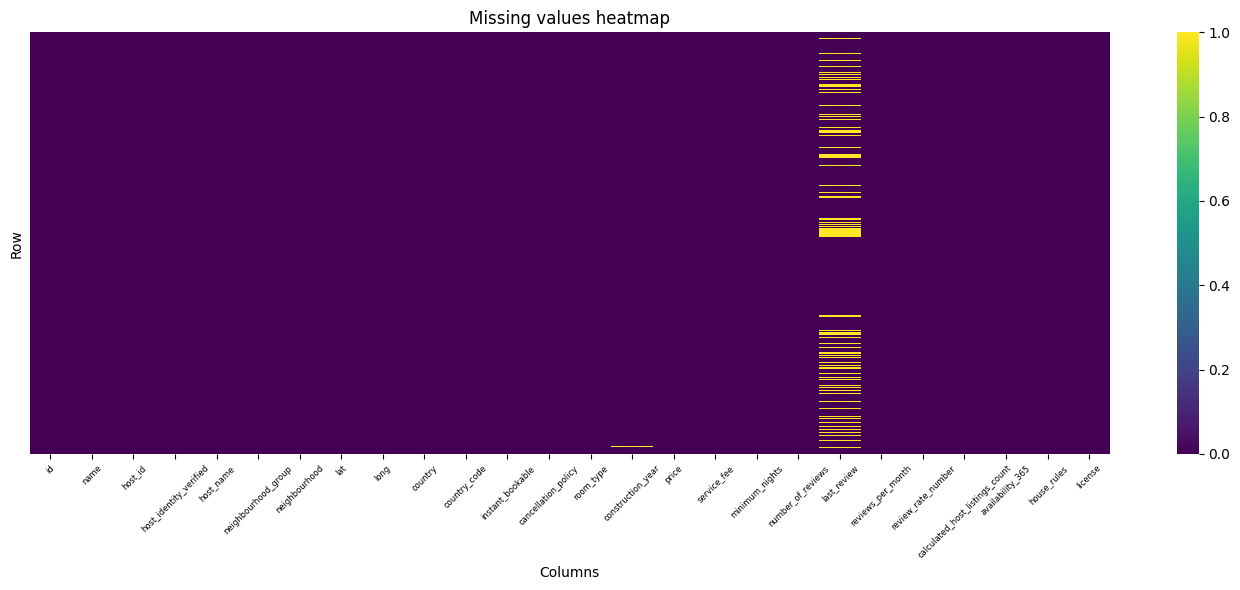

In [31]:
plt.figure(figsize = (14, 6))
sns.heatmap(
    airbnb_df.isna(),
    cbar = True,
    yticklabels = False,
    cmap = "viridis"
)
plt.title("Missing values heatmap")
plt.xlabel("Columns")
plt.ylabel("Row")
plt.xticks(rotation = 45, fontsize = 6)
plt.tight_layout()
plt.show()

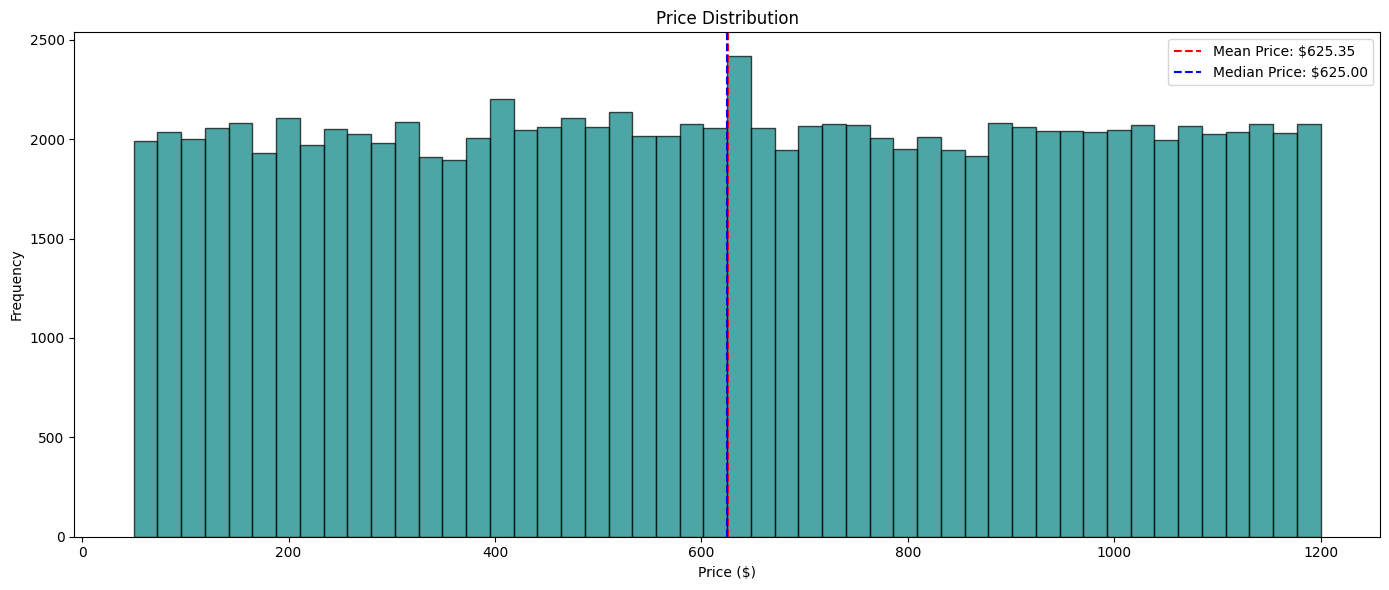

In [33]:
# Price Distribution
plt.figure(figsize = (14, 6))
plt.hist(airbnb_df["price"], bins = 50, alpha = 0.7, color = "teal", edgecolor = "black")
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

# Add summary statistics as text
mean_price = airbnb_df["price"].mean()
median_price = airbnb_df["price"].median()
plt.axvline(mean_price, color = "red", linestyle = "--", label = f"Mean Price: ${mean_price:.2f}")
plt.axvline(median_price, color = "blue", linestyle = "--", label = f"Median Price: ${median_price:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

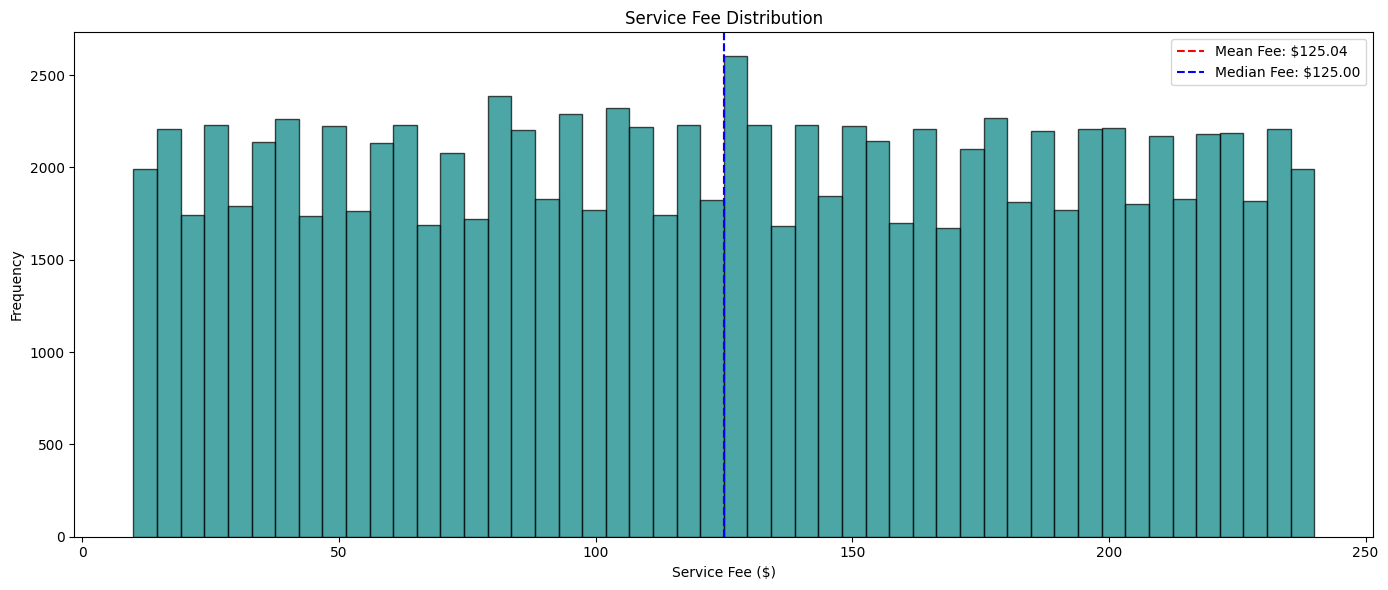

In [34]:
# Price Distribution
plt.figure(figsize = (14, 6))
plt.hist(airbnb_df["service_fee"], bins = 50, alpha = 0.7, color = "teal", edgecolor = "black")
plt.title("Service Fee Distribution")
plt.xlabel("Service Fee ($)")
plt.ylabel("Frequency")

# Add summary statistics as text
mean_fee = airbnb_df["service_fee"].mean()
median_fee = airbnb_df["service_fee"].median()
plt.axvline(mean_fee, color = "red", linestyle = "--", label = f"Mean Fee: ${mean_fee:.2f}")
plt.axvline(median_fee, color = "blue", linestyle = "--", label = f"Median Fee: ${median_fee:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/td/ww89yxjs78g7pbjshk80ysbr0000gn/T/ipykernel_65851/2956623453.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


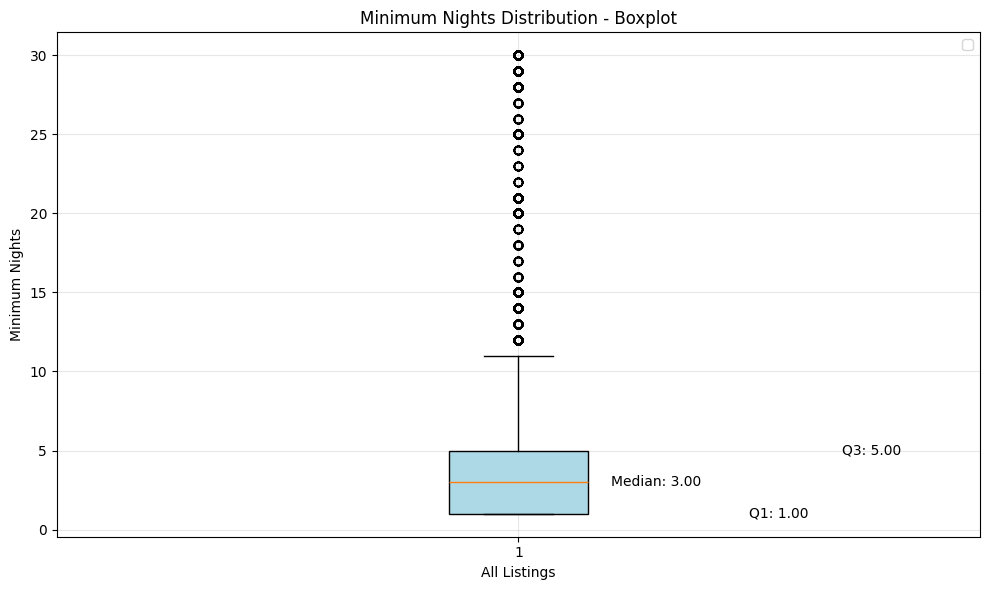

In [35]:
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(airbnb_df["minimum_nights"].dropna(), patch_artist=True)
box_plot["boxes"][0].set_facecolor("lightblue")

plt.title("Minimum Nights Distribution - Boxplot")
plt.ylabel("Minimum Nights")
plt.xlabel("All Listings")
plt.grid(True, alpha = 0.3)

# IQR calculation
median_nights = airbnb_df["minimum_nights"].median()
q1 = airbnb_df["minimum_nights"].quantile(0.25)
q3 = airbnb_df["minimum_nights"].quantile(0.75)

plt.text(1.1, median_nights, f"Median: {median_nights:.2f}", va = "center")
plt.text(1.25, q1, f"Q1: {q1:.2f}", va = "center")
plt.text(1.35, q3, f"Q3: {q3:.2f}", va = "center")

plt.legend()
plt.tight_layout()
plt.show()

/var/folders/td/ww89yxjs78g7pbjshk80ysbr0000gn/T/ipykernel_65851/4078172836.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


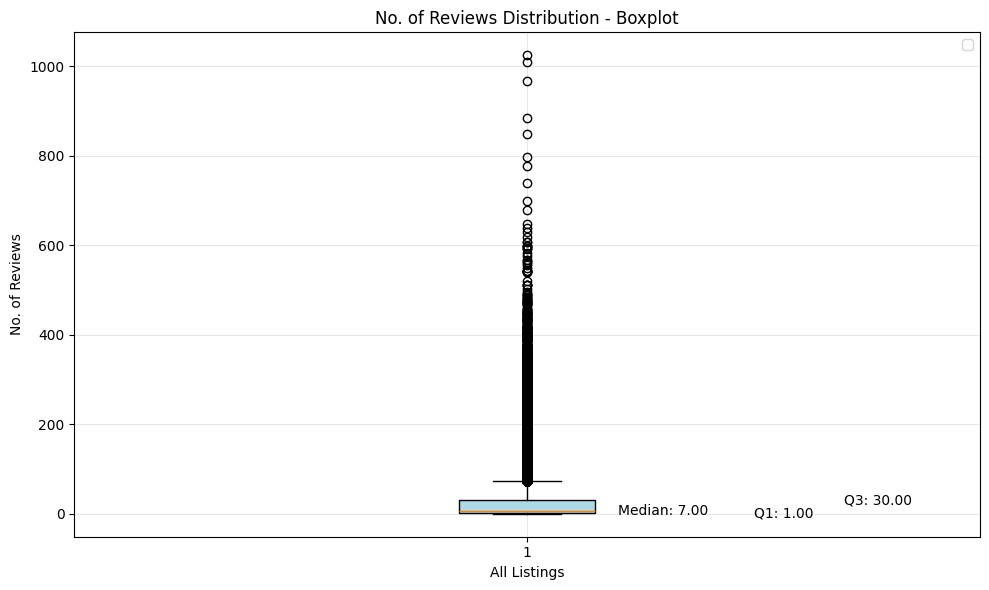

In [36]:
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(airbnb_df["number_of_reviews"].dropna(), patch_artist=True)
box_plot["boxes"][0].set_facecolor("lightblue")

plt.title("No. of Reviews Distribution - Boxplot")
plt.ylabel("No. of Reviews")
plt.xlabel("All Listings")
plt.grid(True, alpha = 0.3)

# IQR calculation
median_reviews = airbnb_df["number_of_reviews"].median()
q1 = airbnb_df["number_of_reviews"].quantile(0.25)
q3 = airbnb_df["number_of_reviews"].quantile(0.75)

plt.text(1.1, median_reviews, f"Median: {median_reviews:.2f}", va = "center")
plt.text(1.25, q1, f"Q1: {q1:.2f}", va = "center")
plt.text(1.35, q3, f"Q3: {q3:.2f}", va = "center")

plt.legend()
plt.tight_layout()
plt.show()

/var/folders/td/ww89yxjs78g7pbjshk80ysbr0000gn/T/ipykernel_65851/4023927012.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


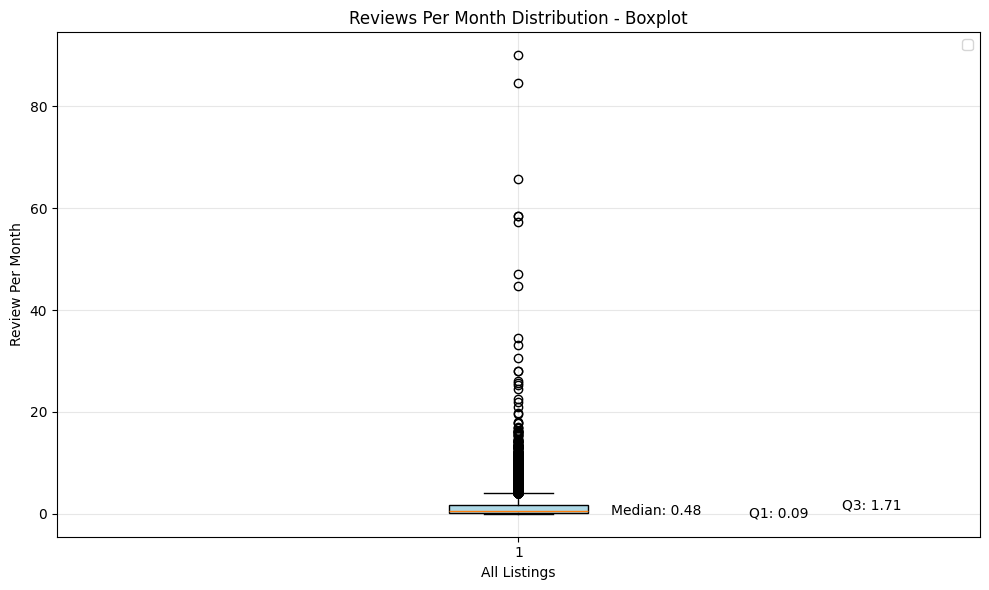

In [37]:
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(airbnb_df["reviews_per_month"].dropna(), patch_artist=True)
box_plot["boxes"][0].set_facecolor("lightblue")

plt.title("Reviews Per Month Distribution - Boxplot")
plt.ylabel("Review Per Month")
plt.xlabel("All Listings")
plt.grid(True, alpha = 0.3)

# IQR calculation
median_reviews_per_month = airbnb_df["reviews_per_month"].median()
q1 = airbnb_df["reviews_per_month"].quantile(0.25)
q3 = airbnb_df["reviews_per_month"].quantile(0.75)

plt.text(1.1, median_reviews_per_month, f"Median: {median_reviews_per_month:.2f}", va = "center")
plt.text(1.25, q1, f"Q1: {q1:.2f}", va = "center")
plt.text(1.35, q3, f"Q3: {q3:.2f}", va = "center")

plt.legend()
plt.tight_layout()
plt.show()

/var/folders/td/ww89yxjs78g7pbjshk80ysbr0000gn/T/ipykernel_65851/686840452.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


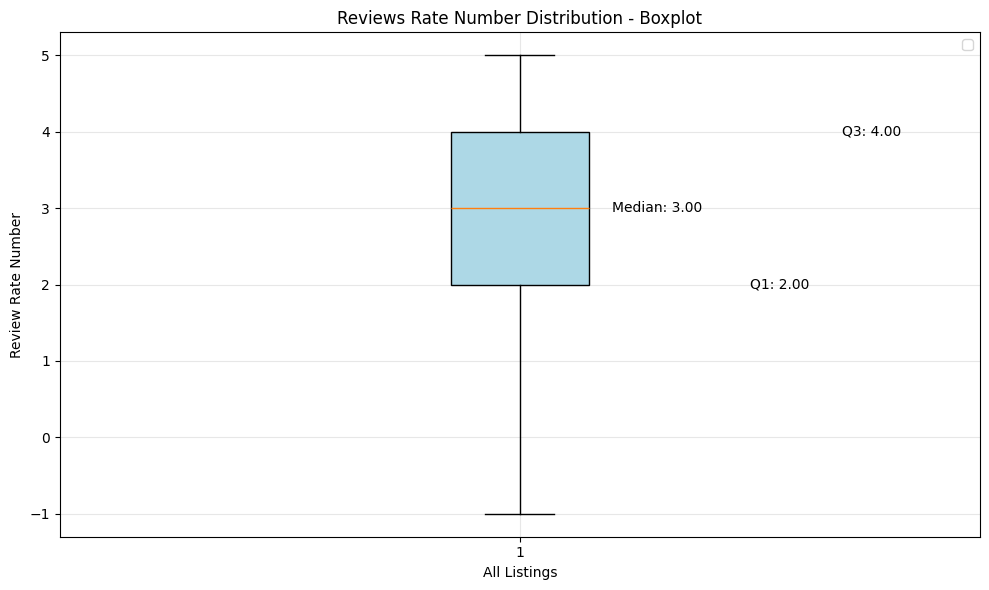

In [38]:
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(airbnb_df["review_rate_number"].dropna(), patch_artist=True)
box_plot["boxes"][0].set_facecolor("lightblue")

plt.title("Reviews Rate Number Distribution - Boxplot")
plt.ylabel("Review Rate Number")
plt.xlabel("All Listings")
plt.grid(True, alpha = 0.3)

# IQR calculation
median_reviews_rate_no = airbnb_df["review_rate_number"].median()
q1 = airbnb_df["review_rate_number"].quantile(0.25)
q3 = airbnb_df["review_rate_number"].quantile(0.75)

plt.text(1.1, median_reviews_rate_no, f"Median: {median_reviews_rate_no:.2f}", va = "center")
plt.text(1.25, q1, f"Q1: {q1:.2f}", va = "center")
plt.text(1.35, q3, f"Q3: {q3:.2f}", va = "center")

plt.legend()
plt.tight_layout()
plt.show()

/var/folders/td/ww89yxjs78g7pbjshk80ysbr0000gn/T/ipykernel_65851/1582700480.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


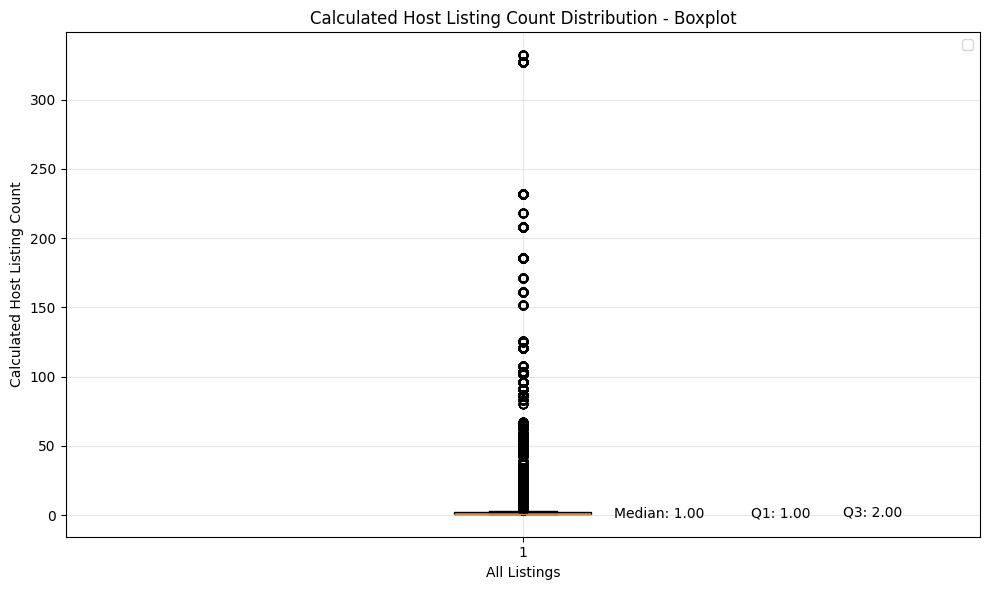

In [39]:
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(airbnb_df["calculated_host_listings_count"].dropna(), patch_artist=True)
box_plot["boxes"][0].set_facecolor("lightblue")

plt.title("Calculated Host Listing Count Distribution - Boxplot")
plt.ylabel("Calculated Host Listing Count")
plt.xlabel("All Listings")
plt.grid(True, alpha = 0.3)

# IQR calculation
median_host_listing = airbnb_df["calculated_host_listings_count"].median()
q1 = airbnb_df["calculated_host_listings_count"].quantile(0.25)
q3 = airbnb_df["calculated_host_listings_count"].quantile(0.75)

plt.text(1.1, median_host_listing, f"Median: {median_host_listing:.2f}", va = "center")
plt.text(1.25, q1, f"Q1: {q1:.2f}", va = "center")
plt.text(1.35, q3, f"Q3: {q3:.2f}", va = "center")

plt.legend()
plt.tight_layout()
plt.show()

/var/folders/td/ww89yxjs78g7pbjshk80ysbr0000gn/T/ipykernel_65851/2332130127.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


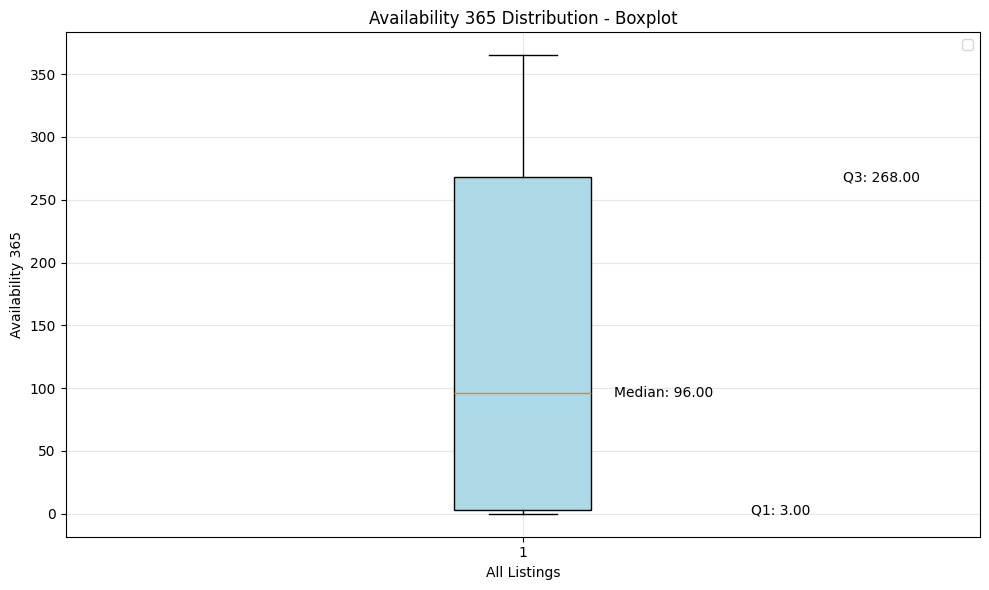

In [40]:
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(airbnb_df["availability_365"].dropna(), patch_artist=True)
box_plot["boxes"][0].set_facecolor("lightblue")

plt.title("Availability 365 Distribution - Boxplot")
plt.ylabel("Availability 365")
plt.xlabel("All Listings")
plt.grid(True, alpha = 0.3)

# IQR calculation
median_availability = airbnb_df["availability_365"].median()
q1 = airbnb_df["availability_365"].quantile(0.25)
q3 = airbnb_df["availability_365"].quantile(0.75)

plt.text(1.1, median_availability, f"Median: {median_availability:.2f}", va = "center")
plt.text(1.25, q1, f"Q1: {q1:.2f}", va = "center")
plt.text(1.35, q3, f"Q3: {q3:.2f}", va = "center")

plt.legend()
plt.tight_layout()
plt.show()

In [41]:
numeric_df = airbnb_df.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_df.corr()
corr_matrix

id   host_id       lat      long  \
id                              1.000000 -0.001189 -0.008609  0.042505   
host_id                        -0.001189  1.000000  0.000384 -0.008807   
lat                            -0.008609  0.000384  1.000000  0.074420   
long                            0.042505 -0.008807  0.074420  1.000000   
construction_year               0.000994  0.004726  0.005490  0.001469   
price                           0.006803  0.003619 -0.005578  0.003347   
service_fee                     0.007158  0.003413 -0.005562  0.003193   
minimum_nights                  0.043629 -0.000964  0.049261 -0.086778   
number_of_reviews              -0.041990 -0.004795 -0.025160  0.068974   
reviews_per_month               0.045844 -0.003023 -0.025583  0.121137   
review_rate_number              0.038409  0.003958 -0.004958  0.015037   
calculated_host_listings_count  0.023749  0.001667  0.032199 -0.104105   
availability_365               -0.133799 -0.002294 -0.005837  0.060024   

                                construction_year     price  service_fee  \
id                                       0.000994  0.006803     0.007158   
host_id                                  0.004726  0.003619     0.003413   
lat                                      0.005490 -0.005578    -0.005562   
long                                     0.001469  0.003347     0.003193   
construction_year                        1.000000 -0.003717    -0.003393   
price                                   -0.003717  1.000000     0.997825   
service_fee                             -0.003393  0.997825     1.000000   
minimum_nights                          -0.003260 -0.003373    -0.003341   
number_of_reviews                        0.001856  0.005176     0.005069   
reviews_per_month                        0.003632  0.005138     0.004978   
review_rate_number                       0.005089 -0.003766    -0.003587   
calculated_host_listings_count          -0.002606 -0.000101     0.000045   
availability_365                        -0.007981 -0.002863    -0.003187   

                                minimum_nights  number_of_reviews  \
id                                    0.043629          -0.041990   
host_id                              -0.000964          -0.004795   
lat                                   0.049261          -0.025160   
long                                 -0.086778           0.068974   
construction_year                    -0.003260           0.001856   
price                                -0.003373           0.005176   
service_fee                          -0.003341           0.005069   
minimum_nights                        1.000000          -0.122103   
number_of_reviews                    -0.122103           1.000000   
reviews_per_month                    -0.230292           0.617937   
review_rate_number                    0.019567          -0.021996   
calculated_host_listings_count        0.269524          -0.080544   
availability_365                      0.150534           0.098093   

                                reviews_per_month  review_rate_number  \
id                                       0.045844            0.038409   
host_id                                 -0.003023            0.003958   
lat                                     -0.025583           -0.004958   
long                                     0.121137            0.015037   
construction_year                        0.003632            0.005089   
price                                    0.005138           -0.003766   
service_fee                              0.004978           -0.003587   
minimum_nights                          -0.230292            0.019567   
number_of_reviews                        0.617937           -0.021996   
reviews_per_month                        1.000000            0.030482   
review_rate_number                       0.030482            1.000000   
calculated_host_listings_count          -0.039670            0.024642   
availability_365    

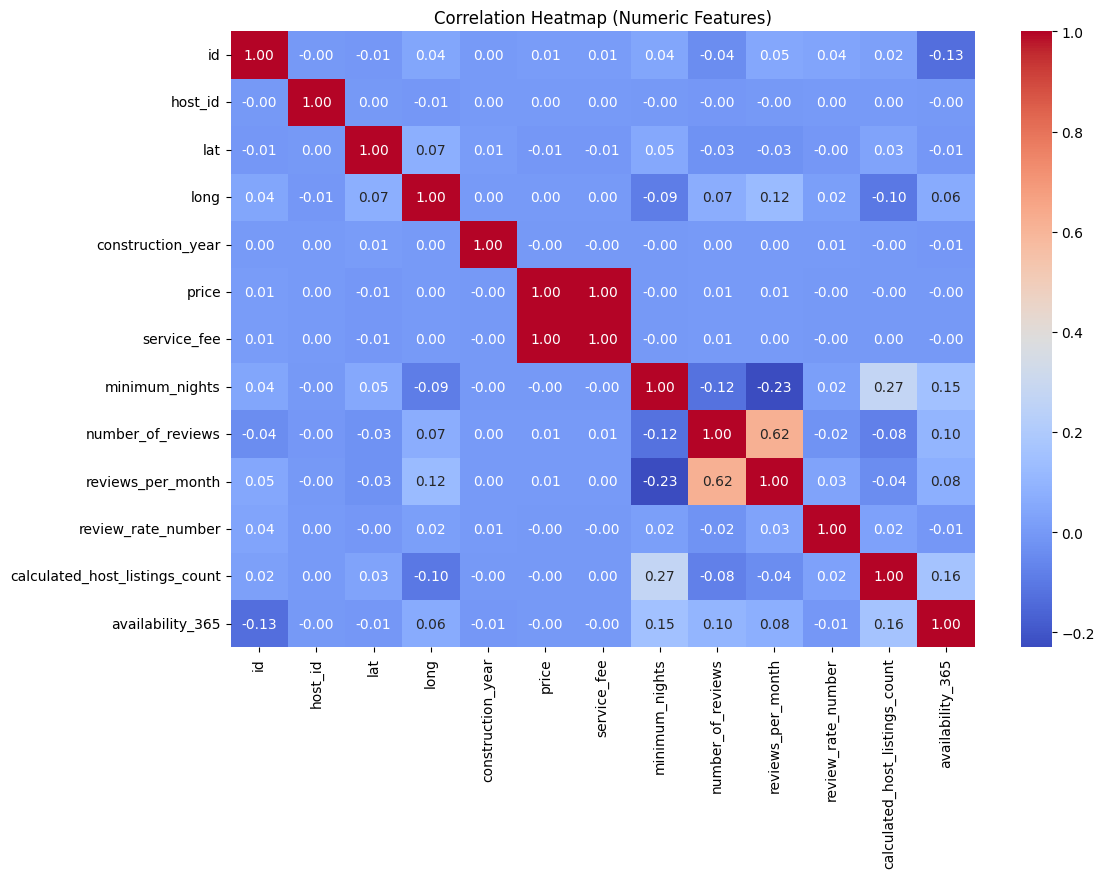

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [44]:
numeric_list = ["price", "service_fee", "minimum_nights", "number_of_reviews", "reviews_per_month", "review_rate_number", "calculated_host_listings_count", "availability_365"]
import plotly.express as px

fig = px.scatter_matrix(airbnb_df,
    dimensions = numeric_list,
    color = "neighbourhood"
)

fig.update_layout(
    title=dict(text='Airbnb Data set'),
    dragmode='select',
    width=1600,
    height=1600,
    hovermode='closest',
)
fig.update_xaxes(tickangle = 90)
fig.update_yaxes(tickangle = 90)
fig.show()

In [32]:
airbnb_df.to_csv("../data/processed/airbnb_listings.csv", index = False)